In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
macro = pd.read_csv('../data/macro_data_cleaned.csv')
macro = macro.iloc[:,1:]

In [3]:
x = macro.drop(['Mnemonic'], axis=1).values
y = macro['Mnemonic'].values

x = StandardScaler().fit_transform(x)
features = list(macro.columns[1:])
x_df = pd.DataFrame(x, columns=features)


pca = PCA(n_components=20)
pca.fit_transform(x_df).shape

(37, 20)

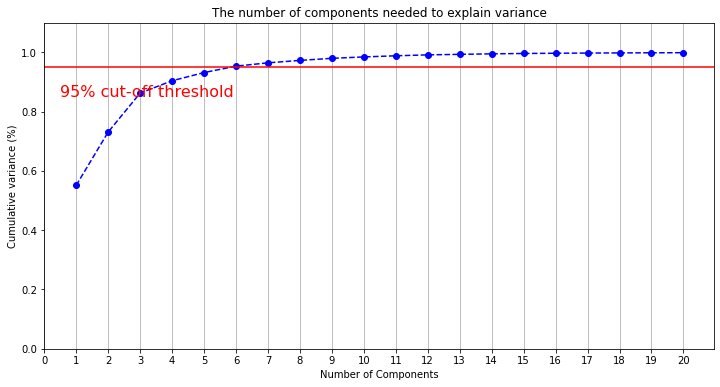

In [4]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 21, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 21, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [5]:
pca = PCA(n_components=6)
pca_array = pca.fit_transform(x_df)
pca_df = pd.DataFrame(pca_array, columns = [f"pca{num+1}" for num in range(6)])
pca_df.insert(0,'Mnemonic',macro["Mnemonic"])
pca_df

pca_df.to_csv('../data/pca_macro.csv',index=False)

df = pd.read_csv('../data/pca_macro.csv')
df

,Mnemonic,pca1,pca2,pca3,pca4,pca5,pca6
0,201801,-6.517806,4.123471,-4.323530,0.185720,2.191525,2.575033
1,201802,-6.407877,3.912278,-4.092868,-0.005099,1.387246,1.921441
2,201803,-6.320073,3.500826,-3.598134,0.040396,1.329952,1.696535
3,201804,-6.475806,3.273602,-3.439609,0.314958,0.727026,1.330711
4,201805,-6.504495,2.724625,-2.887565,0.394235,0.783710,1.188454
5,201806,-6.361751,2.489270,-2.802809,0.369761,0.558054,0.400310
6,201807,-6.223080,1.984654,-2.464190,0.607792,0.311032,0.085349
7,201808,-6.072541,1.630106,-2.141376,0.744067,0.077647,-0.200107
8,201809,-5.929753,1.302250,-1.753394,0.172565,-0.052948,-0.498745
9,201810,-5.948962,0.859243,-2.038835,-0.219677,-0.679609,-1.324000
